In [16]:
from Q_learning import MountainCarAgent

alpha = 0.8 
gamma = 0.8   
epsilon = 1.0      
epsilon_min = 0.01 
epsilon_dec = 0.999
episodes = 10000
    
import gymnasium as gym
env = gym.make('MountainCar-v0')

agent = MountainCarAgent(
        env=env,
        alpha=alpha,
        gamma=gamma,
        epsilon=epsilon,
        epsilon_min=epsilon_min,
        epsilon_dec=epsilon_dec,
        episodes=episodes
    )

In [17]:
q_table = agent.train(max_steps_per_episode=200, run_name="MountainCar_Q_Learning_2")


try:
    test_env = gym.make('MountainCar-v0')
    agent.env = test_env
    _, _, wins = agent.test(num_episodes=100)
except Exception as e:
    print(f"Could not render test environment: {e}")
    print("Running without visualization")
    agent.test(num_episodes=5, render=False)


Episode: 100/10000, Avg Reward: -200.00, Avg Steps: 200.00, Epsilon: 0.9048
Episode: 200/10000, Avg Reward: -200.00, Avg Steps: 200.00, Epsilon: 0.8186
Episode: 300/10000, Avg Reward: -200.00, Avg Steps: 200.00, Epsilon: 0.7407
Episode: 400/10000, Avg Reward: -200.00, Avg Steps: 200.00, Epsilon: 0.6702
Episode: 500/10000, Avg Reward: -200.00, Avg Steps: 200.00, Epsilon: 0.6064
Episode: 600/10000, Avg Reward: -200.00, Avg Steps: 200.00, Epsilon: 0.5486
Episode: 700/10000, Avg Reward: -200.00, Avg Steps: 200.00, Epsilon: 0.4964
Episode: 800/10000, Avg Reward: -200.00, Avg Steps: 200.00, Epsilon: 0.4491
Episode: 900/10000, Avg Reward: -200.00, Avg Steps: 200.00, Epsilon: 0.4064
Episode: 1000/10000, Avg Reward: -200.00, Avg Steps: 200.00, Epsilon: 0.3677
Episode: 1100/10000, Avg Reward: -200.00, Avg Steps: 200.00, Epsilon: 0.3327
Episode: 1200/10000, Avg Reward: -200.00, Avg Steps: 200.00, Epsilon: 0.3010
Episode: 1300/10000, Avg Reward: -200.00, Avg Steps: 200.00, Epsilon: 0.2724
Episode:

/Users/alessi/Workspace/insper/7-semestre/Reinforcement-Learning/Reinforcement-Learning-Mountain-Car/env/lib/python3.13/site-packages/gymnasium/envs/classic_control/mountain_car.py:179: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("MountainCar-v0", render_mode="rgb_array")
  gym.logger.warn(


In [18]:
losses = 100 - wins 

print(f"Wins {wins}")
print(f"Losses {losses}")

Wins 35
Losses 65


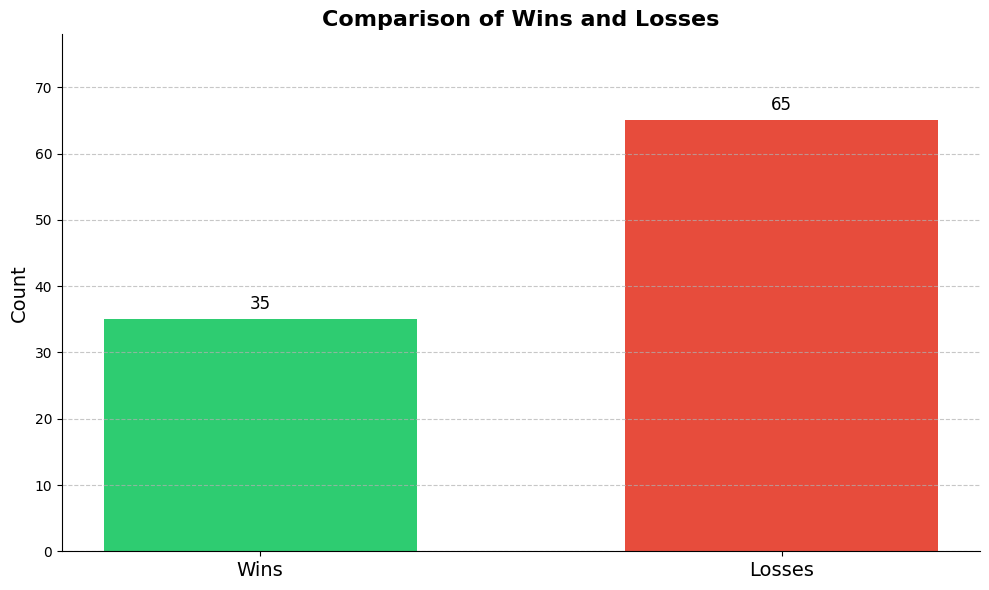

Bar graph comparing Wins and Losses created successfully!
Wins: 35
Losses: 65
Win Rate: 35.00%


In [19]:
import matplotlib.pyplot as plt
import numpy as np



# Creating the bar graph
fig, ax = plt.subplots(figsize=(10, 6))

# Bar positions
x = np.array([0, 1])
y = np.array([wins, losses])

# Creating bars
bars = ax.bar(x, y, width=0.6, color=['#2ecc71', '#e74c3c'])

# Adding text labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height}', ha='center', va='bottom', fontsize=12)

# Customizing the graph
ax.set_title('Comparison of Wins and Losses', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(['Wins', 'Losses'], fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_ylim(0, max(y) * 1.2)  # Set y-axis limit with some padding
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding a grid for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Save the figure
plt.tight_layout()
plt.savefig('wins_losses_comparison.png', dpi=300)

# Display the graph
plt.show()

print("Bar graph comparing Wins and Losses created successfully!")
print(f"Wins: {wins}")
print(f"Losses: {losses}")
print(f"Win Rate: {(wins/(wins+losses))*100:.2f}%")